In [ ]:
!conda install -y matplotlib

# ICS 434: DATA SCIENCE FUNDAMENTALS

## Modules and Packages in Python

---

### Introduction to the Pandas' Python Package

* What are `Python` modules and packages? 

* Why are they useful? 

* What is Pandas?

### Python Modules and Packages


* Python implementation of the DRY principle of software engineering  

* Module: A module is a single Python file containing definitions and implementations, 
  * e.g., functions, classes, and variables. 
  * Used to organize code logically and reuse it across different projects. 
    * For example, a file math_operations.py containing various math functions can be a module.

* Package: A package is a collection of Python modules organized in a directory structure. 
  * It includes an __init__.py file to indicate that the directory is a package. 
  * This structure allows for organizing modules into different namespaces. 

* A module is imported using the `import <module>` construct

* The package's functionality can be accessed through the module name using the *dot* notaion

* See for example <PATH_TO_PYTHON_ENVIRONMENT>/python3.9/site-packages/pandas/core/tools  


### Importing Python Modules


* You must import the module into your file to be able to use it. 

* We can do this in two ways:

__1.__ Import __all__ the funcitonality in a package, and with it all the functionality and definitions
  * Keep the functionality bound to package name

```python
>>> import math
```

* To reference definitions or functionality after this import statement, we use *dot* notation. For example, if we wanted to access the `math` package's definition for *$\pi$*  we would type:

```python
>>> math.pi
3.141592653589793
```


In [1]:
import math
math.pi

3.141592653589793

In [2]:
# Computes n!
math.factorial(4)

24

### Importing Python Modules -- Cont'd

__2.__ Only import some of the module's functionality 

* If we wanted to only import the `math` package's definition for *$\pi$*  we would type 

```python
>>> from math import pi
```

* Then to reference `pi` all we would type is:

```python
>>> pi
3.141592653589793
```

### Importing Python Modules -- Don't

* Do not use the `*` symbol to import all the functionality. E.g.:

```python

from math import *

```

* The `*` imports all the functionality into your workspace
  * Functionality can be accessed without using the module name as a prefix. E.g.:

```python
r = 2
c = 2 * pi * r
```

* The above:
  * Pollutes your workspace
  * Creates the potential for variable name clashes 
  * Makes your code harder to read

### Providing a Package Alias

* It's common to rename (alias) modules when importing them.
    * Saving us some keystrokes when typing the module name
* Ex.

```python
from matplotlib import pyplot as plt
```
- Accessing the functionality and definitions is done by using `plt` instead of `pyplot`

```python
plt.scatter(x, y)
```


### Providing a Package Alias -- Cont'd


* When using an alias, the expression `from X import Y as Z` is often shortened as `import X.Y as Z`. E.g.:

```python
import matplotlib.pyplot as plt
```

* Aliases are typically standardized by convention or established by the package developers. E.g.:
    * Alias for `Pandas` is `pd`
    * Alias for `NumPy` is `np`
    * Alias for `Seaborn` is `sns`
    * Alias for `pyplot` is `plt`


* Import to stick to the those conventions



In [3]:
import pandas as pd
x = pd.DataFrame({"A": [1,2,3,4], "B":[5,6,7,8]})

x

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


<BarContainer object of 4 artists>

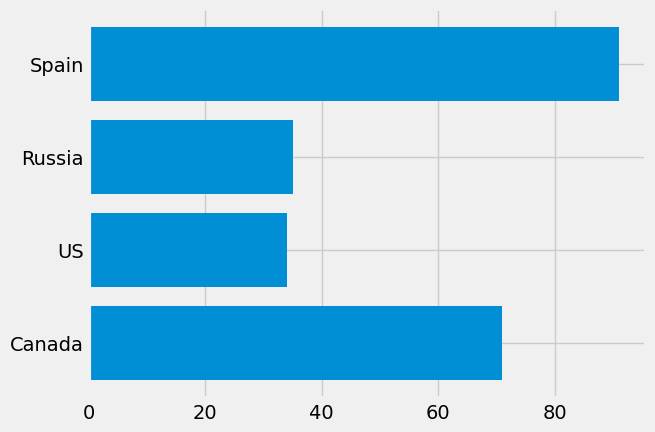

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.barh(["Canada", "US", "Russia", "Spain"], [71, 34, 35, 91])

### Python Packages

* It's often impractical to combine all the desired functionality into a single module (file)

* Example: If you work for Hawaiian airlines in analytics, you may separate customer analytics and freight analytics into two different modules
  * For convenience, you'd place both modules (python files) to live under the same folder (folder)

* A package in Python is merely a directory that contains a collection of modules
  * It includes an `__init__.py` file to indicate that the directory is a package.
  * Can also contain additional files, such as doc, configuration, etc.
  * A package can further be split into sub-packages
    * Freight can, for instance, be split into two modules, commercial vs. personal modules. etc.

* Top package is often called a library


### Modules and Packages

![](images/packages_modules.png)

### Types of Python Modules


* There are 3 types of `Python` modules and packages:

1. Distributed with `Python` but not available for use by default.
  * Ex. `datetime`, `random`, `collections`, etc.
  * Do not need to be installed but need to be imported before being used.
  
2.   Modules typically not included in the default Python installation but that are bundled in packages that can be installed by the Conda installer. Those are also not available by default.
  * Ex. `numpy`, `pandas`, `matplotlib`, etc.
  * If the minimal `Conda` install was selected, these may be installed manually

3. Other modules in specialized packages must be installed manually using `Conda`.
  * Ex. `BioPython`, `astropy`, `tensorflow`, etc



### Example of Modules Distributed with Python

```python
import random 

my_list = [1,2,3,4,5,6,7,8]
print("Before the shuffle, my_list is %s" % my_list)
random.shuffle(my_list)
print("After the shuffle, my_list is %s" % my_list)
```




In [1]:
import random 

my_list = [1,2,3,4,5,6,7,8]
print("Before the shuffle, my_list is %s" % my_list)
random.shuffle(my_list)
print("After the shuffle, my_list is %s" % my_list)

Before the shuffle, my_list is [1, 2, 3, 4, 5, 6, 7, 8]
After the shuffle, my_list is [8, 7, 1, 4, 3, 6, 5, 2]


### Pandas Example

```python
import pandas
page = "https://en.wikipedia.org/wiki/List_of_airline_codes"
airlines_info = pandas.read_html(page, header=0)[0]
airlines_info[airlines_info["Call sign"] == "HAWAIIAN"]
```

In [2]:
import pandas 
page = "https://en.wikipedia.org/wiki/List_of_airline_codes"
airlines_info = pandas.read_html(page, header=0)[0]
airlines_info[airlines_info["Call sign"] == "HAWAIIAN"]

,IATA,ICAO,Airline,Call sign,Country/Region,Comments
3092,HA,HAL,Hawaiian Airlines,HAWAIIAN,United States,NaN


### Example of Installing a Specialized Package Using `conda`

```python
!conda install -y biopython
```

### Why Pandas

* `Pandas` is the de facto package for data wrangling in Python
 * Provides functionality that covers the complete data wrangling workflow
   * From reading and writing files in different formats to filling missing values and to merging datasets
 * Packages in basic statistical and vizualization functionality to facilitate the analysis


### Simple Data Wrangling Scenario

* Transforming your data with the intent of making it more suitable for analysis
* Ex. if you're interested in displaying `avg` flight delays for a defunct airline
* Hypothesis: do defunct companies have a worse delay track record? 

### Simple Data Wrangling Scenario - Steps

1. Merge the wikipedia page earlier with delays database
2. Drop any airline that is not defunct
3. Remove airlines that do not have delay info (missing values)
4. Normalize delay 
  * Some delay could be in minutes, others may be in hours
  * Some delays may be written as 5h20m other may be 5h:20m or 5:20
5. etc...